In [ ]:
# import pytesseract
import cv2
from PIL import Image
import numpy as np
import os
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

### 2018

In [ ]:
raw_2018 = '1 D B B B B B C A B D A A B C D A D D B C A D C A 2 B B A C C D D B A A C A C B A D B A A D A C A A 3 D A C D D D C A A C A C C B C B D B A A A B B C 4 B C A C C B A C A A B B C B C B D C A A C D A A 5 B A D A B C A C C B A C A C C A B D D B C B B D 6 C C B D C D C D C B D B D A B C B D A B C D A A 7 C B D C C A B D D B B B A A C C B B D C D C D C 8 A D A D D C B D B A B C D B A A D D B C A B B B 9 C C B A A D D C C C D C C C B D B C C A A B D B 10 C A C B A B A A B D C C C C A C C A C A B D D C 11 C C B B B C B D B C A A C C C C C B A B C B B B 12 B B B D C D C D C A C B D A B A A B B B A C A B 13 A D D D D D D D D B B D D A D D A A A A A C B D 14 C C C C D C B A A B D A B D C C A C C A A C C C 15 C A A B A C D B D A D D B A C D B C C C C A A D 16 B B B A B D A B D C C D C A D B A A A D A D C C 17 B D B D D C B A B D A A C D B A D D B D B B B D 18 D C C D A A A D B A D B D A C D B A B D C D B A 19 B D B B B A C C A C B A D C D C C B A C B B B D 20 C D A D C A B A A D C A D A B C A C A C C B A B 21 A D A A D B A C C A B A C D B D B B D C D C A C 22 B B C D A B A C A A C B C A D C D C B D A A A C 23 B B B B B B C C D D C D D B D A B D C A D A B A 24 A A D D C B C B D C C B B C C C D A B C D C B C 25 A B B B C B A A B C B B B D B A B B D C C C D B 26 B D A A D A B C A B D A D C C A C B A D D A B A 27 A D A D B B A D C B B B B D C C A D B A B A D B 28 D A D D B B C A B A C D D C D A A B B A D C C A 29 C B B B B B B B C B D A D A C A C C A A B C C A 30 C D B A D D D B B B B B B D D C B C C C D A C A 31 C C B B A C B D A C A A D A D C C D D D B B A B 32 B B D A D A A D A A D D C C B D C D B C C C C B 33 C A D D A B B C B C A D B A D A D A D C D B C C 34 A B A A C A B B D C C A B D B A C B B A D B A B 35 A B D B A B D B B A A B C D D A C C D D C C A C 36 C D B A B D C A C B C D D D D D C A C A D D D A 37 A A D A B C C A A D B B D C D A A A C D C A A A 38 A C D C A A C C D D C B B D B D D D C D B D D A 39 A C A C D A D D C D B D D D B C D C D A B A D B 40 D A D B C D C A B B C B B C C D C A D A D D D B 41 C D D A C D C A D C B D D D D D C C C C B D C C 42 C D A A D A D B C D D A B C B C C A C D B A C B 43 C C A B A A D C C C A B B D A D B B C C D A C C 44 A D A B A A D D C C D D B D B C A A D C B A D B 45 A C D B A D B C B B A D C D A A A B A D B D D A 46 B D A C D A A B A B A B C A D A D C A D D D A C 47 A C A C C B A B A A A D C B B B C A A D B A B C 48 B B A C D A D D D D B A A C C B D D C B A B A A 49 B A D B C C D B D D D D A C B D D A C A A A C B 50 B B D B C C C B D C D D A C B D D C D D A D C A'

In [ ]:
list_2018 = []
for i in raw_2018:
  if i.isalpha() == True:
    list_2018.append(i)
  else:
    pass
answer_2018 = np.array(list_2018).reshape(50, 24)

In [ ]:
def continuity_check(x):

  y = LabelEncoder().fit_transform(x.ravel())
  y = y.reshape(50, 24)

  plt.figure(figsize = (25, 12))
  plt.imshow(y)
  plt.axis('off')

  return y

def plot_dist_each_exam_code(answer_array):
  answer_df = pd.DataFrame(answer_array)
  sns.catplot(data = answer_df.melt(var_name = 'code'), x = 'value', col = 'code',
              col_wrap = 4, kind = 'count', order = ['A', 'B', 'C', 'D'],
              sharex = False, height = 4, aspect = 1)

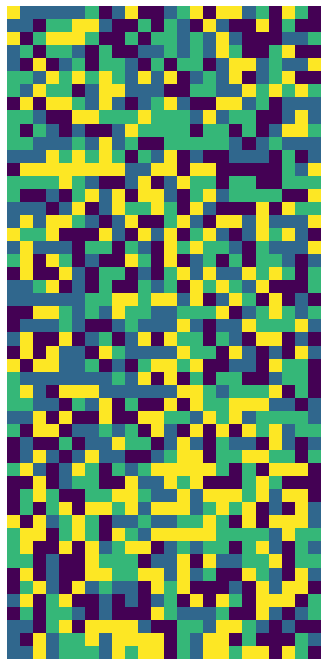

In [ ]:
continuity_2018 = continuity_check(answer_2018)

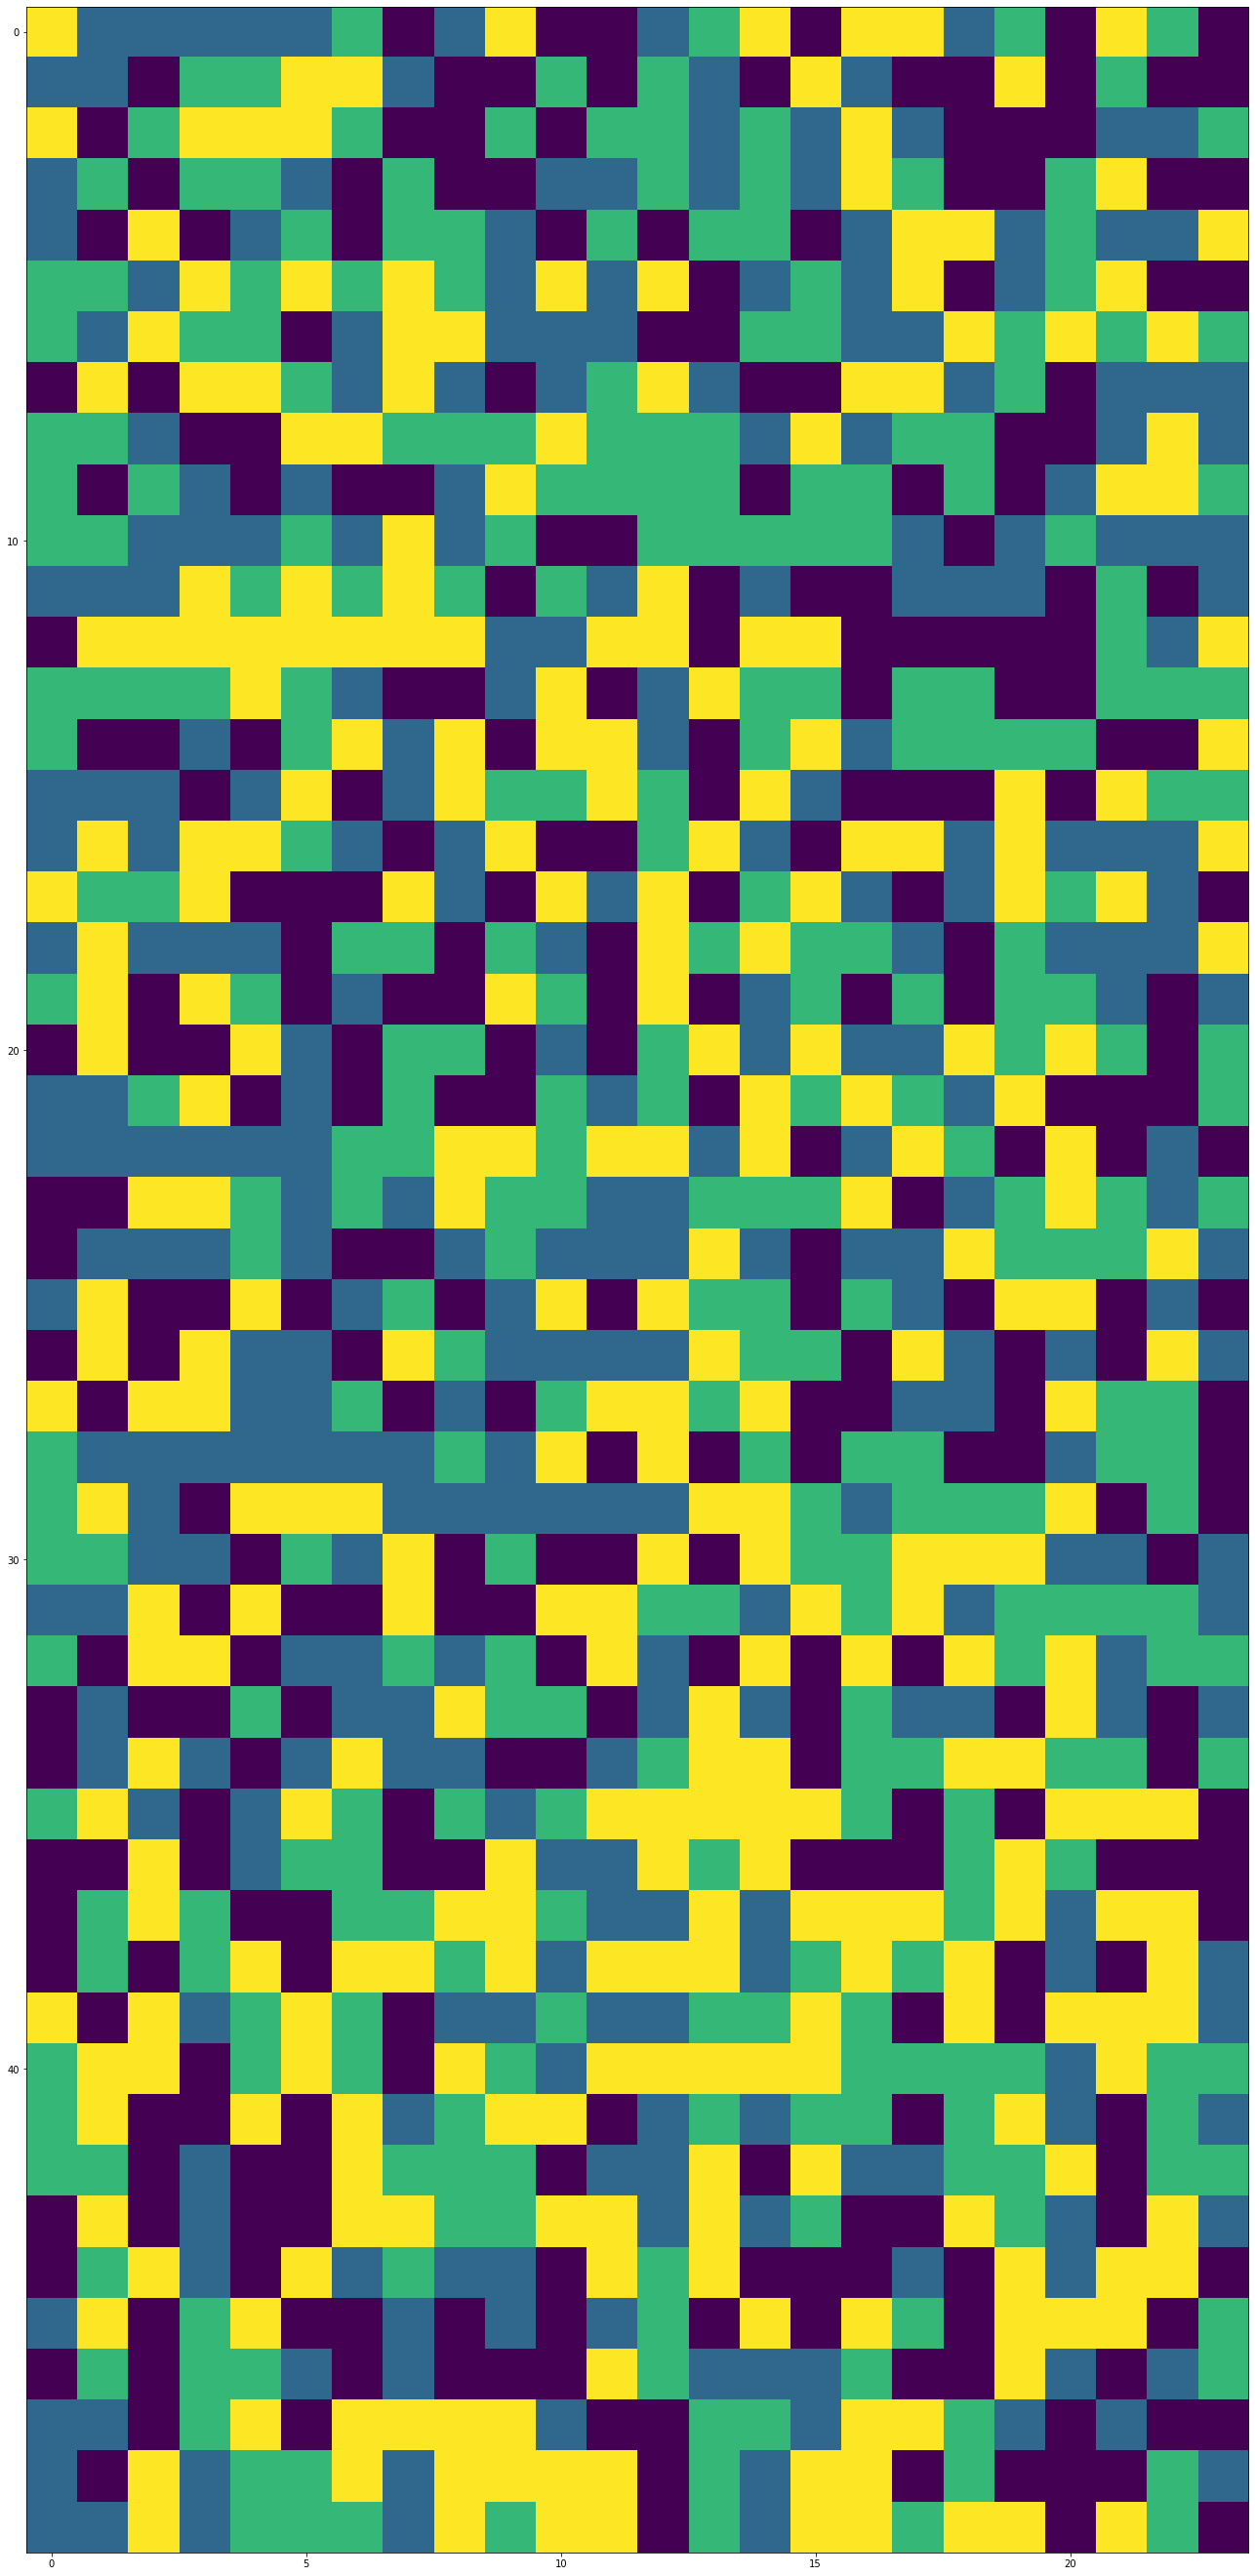

In [ ]:
plt.figure(figsize = (100, 48))
plt.imshow(continuity_2018)

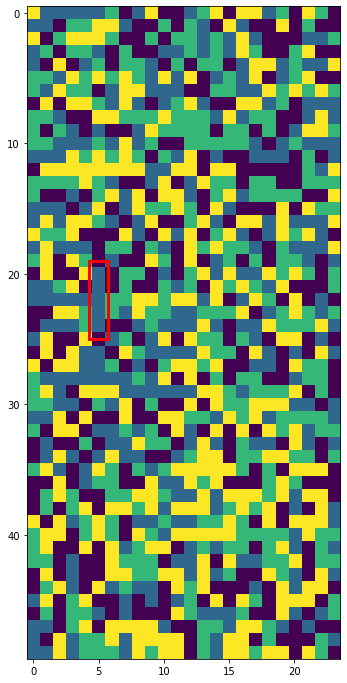

In [ ]:
import matplotlib.patches as patches
plt.figure(figsize = (25, 12))
plt.imshow(continuity_2018)
a = [4, 4]
b = [19, 25]
rectangle = patches.Rectangle((4.3, 19), 1.4, 6, edgecolor = 'red', facecolor = 'none', lw = 3)
plt.gca().add_patch(rectangle)

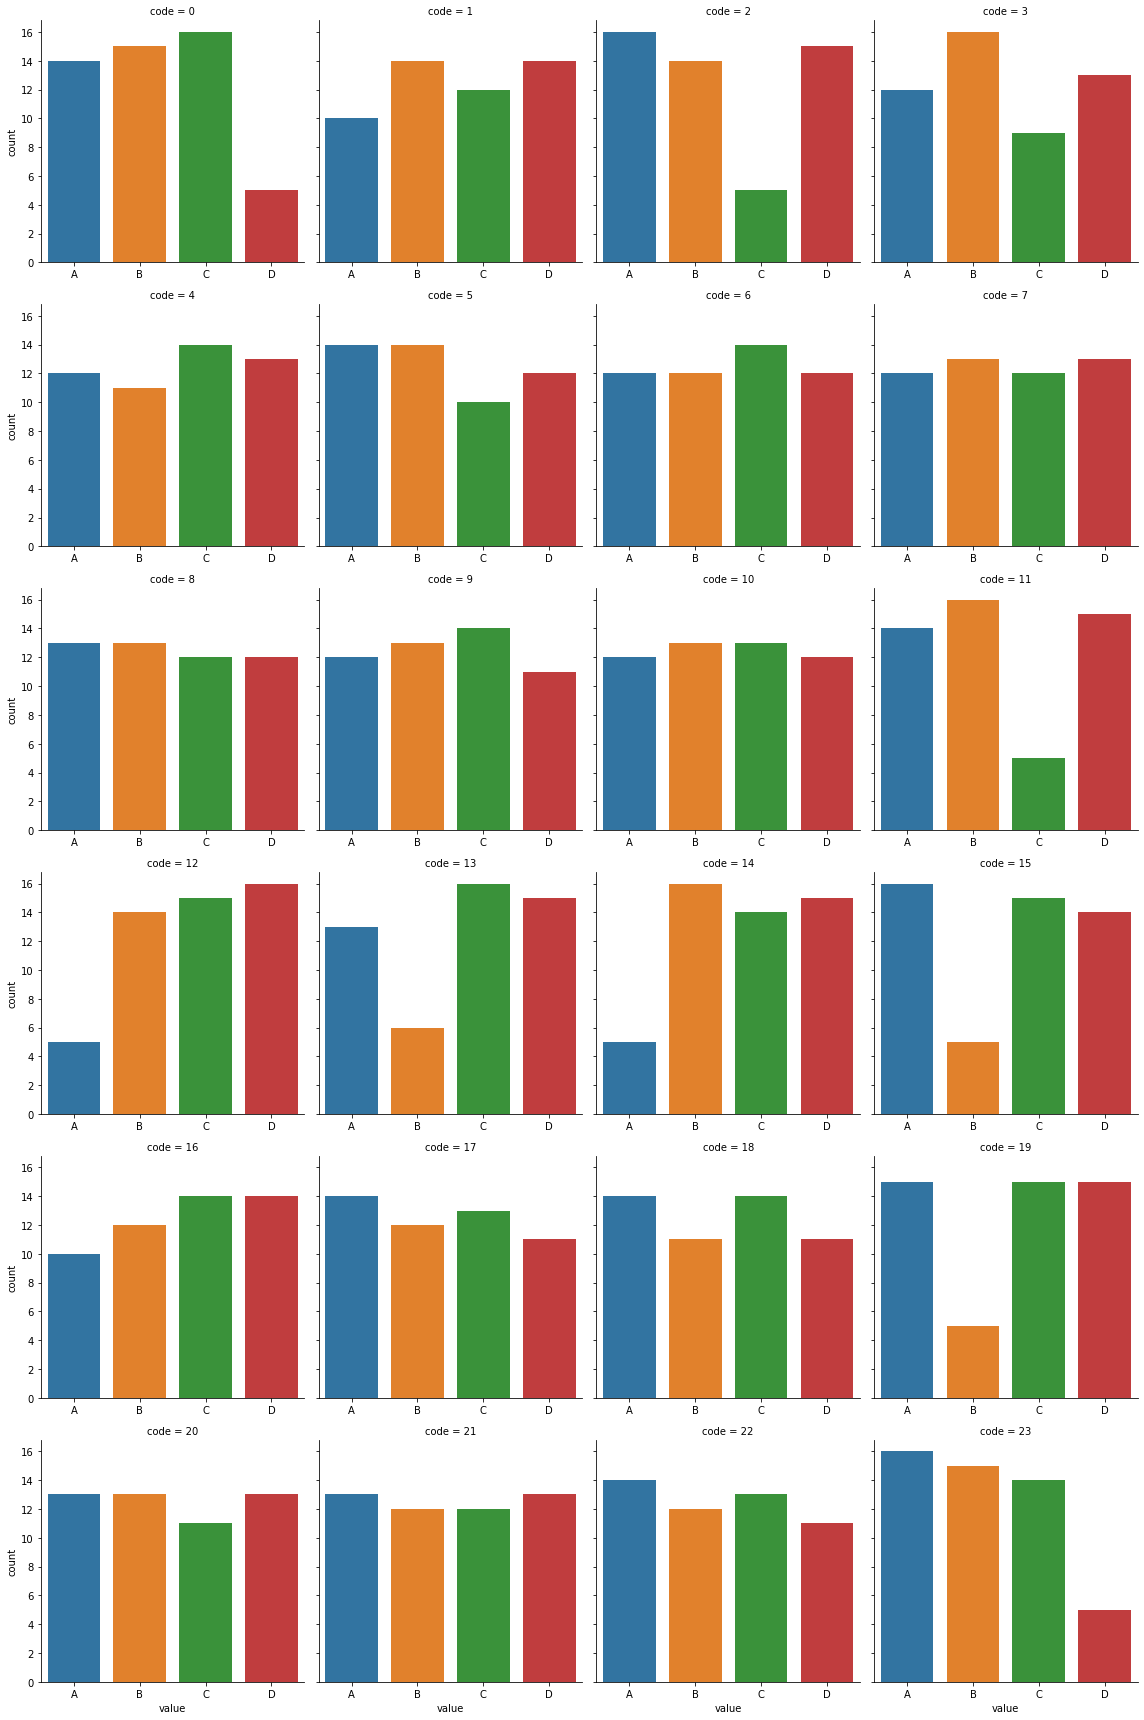

In [ ]:
plot_dist_each_exam_code(answer_2018)

### 2019

In [ ]:
raw_answer_2019 = pd.read_csv('drive/MyDrive/English Exam Answers/2019(2).csv')
# raw_df_20192.head(17)

In [ ]:
def remove_rows(raw_answer):

  rows_to_remove = []
  for i in range(1,24):
    rows_to_remove.append(6*i - 1)

  raw_answer = raw_answer.drop(raw_answer.index[i] for i in rows_to_remove)

  return raw_answer

def get_letters(answer):

  letters = []
  answer = answer.to_numpy()
  
  for i in range(120):
    for j in range(10):
      for k in answer[i][j]:
        if k.isalpha() == True:
          letters.append(k)

  answer = np.array(letters).reshape(24, 50).T

  return answer

In [ ]:
answer_2019 = remove_rows(raw_answer_2019)
answer_2019 = get_letters(answer_2019)

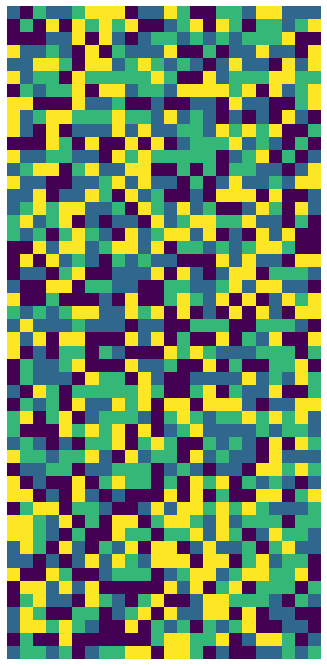

In [ ]:
continuity_2019 = continuity_check(answer_2019)

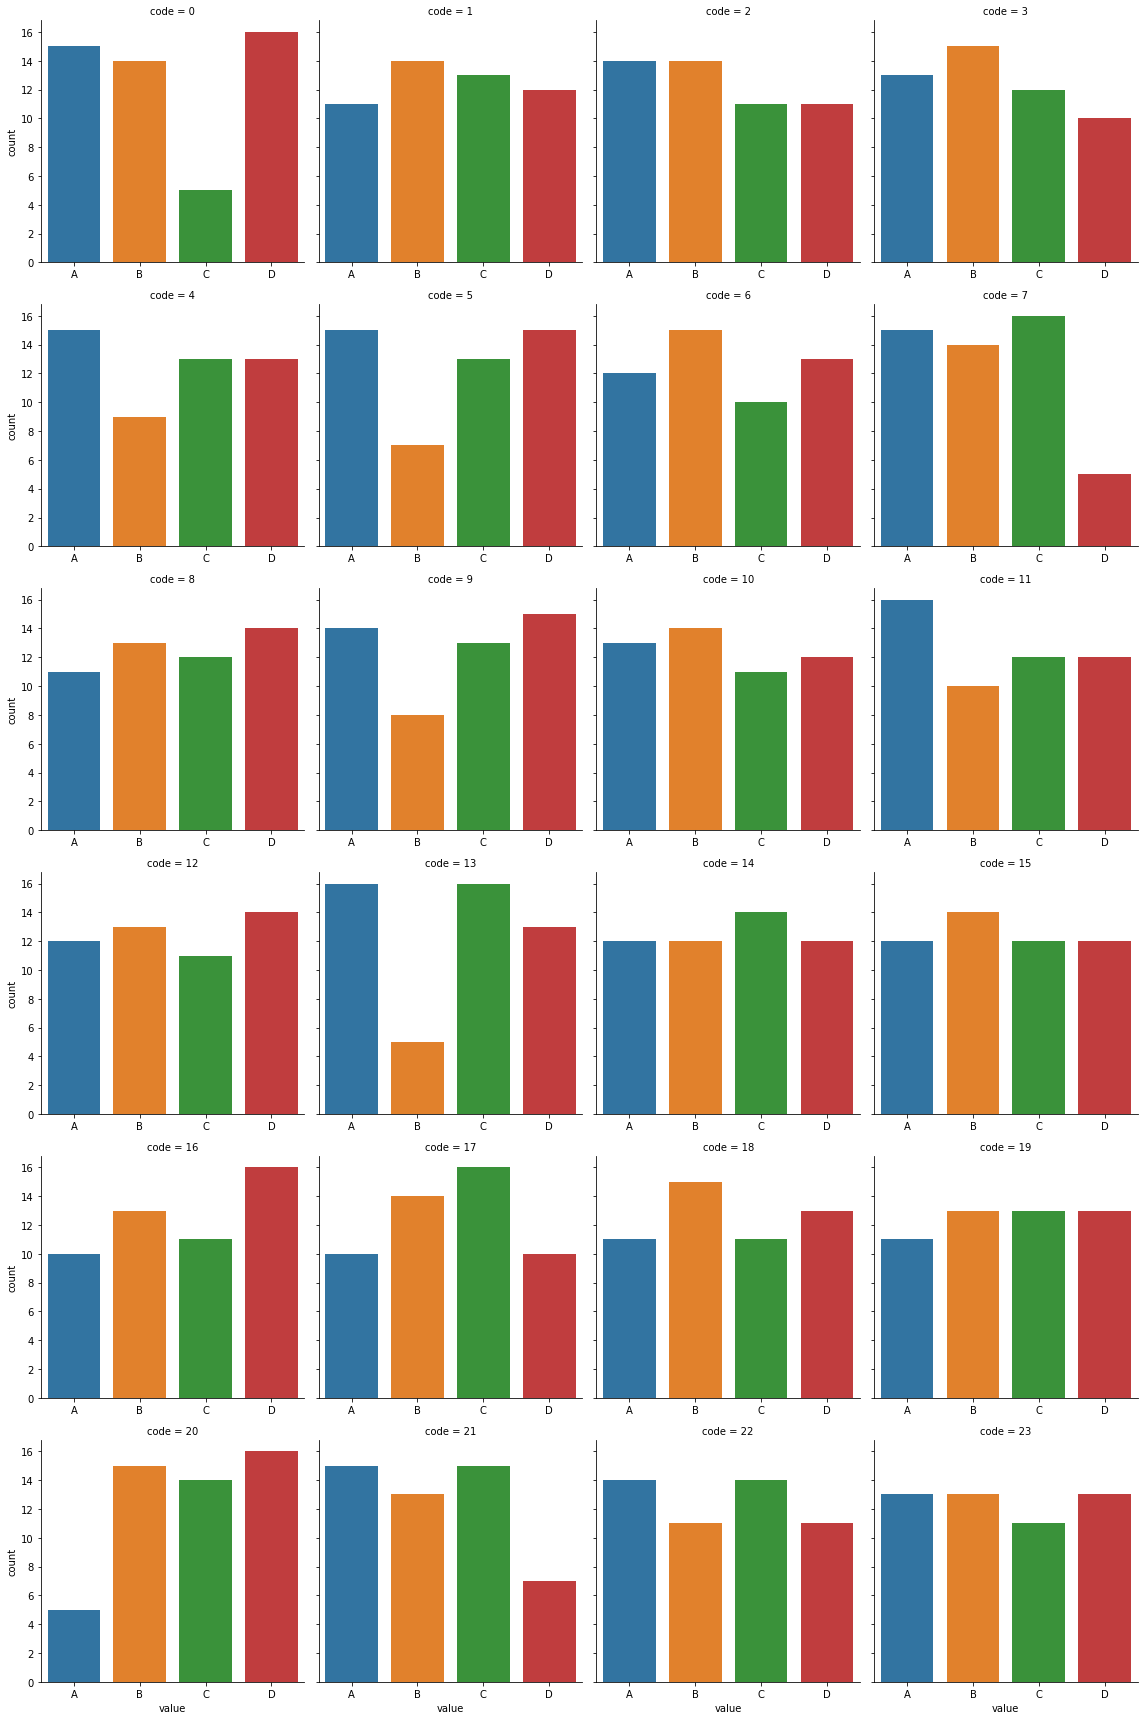

In [ ]:
plot_dist_each_exam_code(answer_2019)

### 2021

In [ ]:
raw_answer_2021 = pd.read_csv('drive/MyDrive/English Exam Answers/2021/test_2021 - Sheet1 (1).csv')

In [ ]:
answer_2021 = remove_rows(raw_answer_2021)
answer_2021 = get_letters(answer_2021)

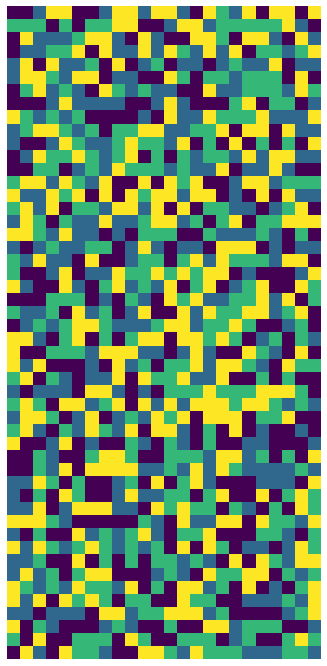

In [ ]:
continuity_2021 = continuity_check(answer_2021)

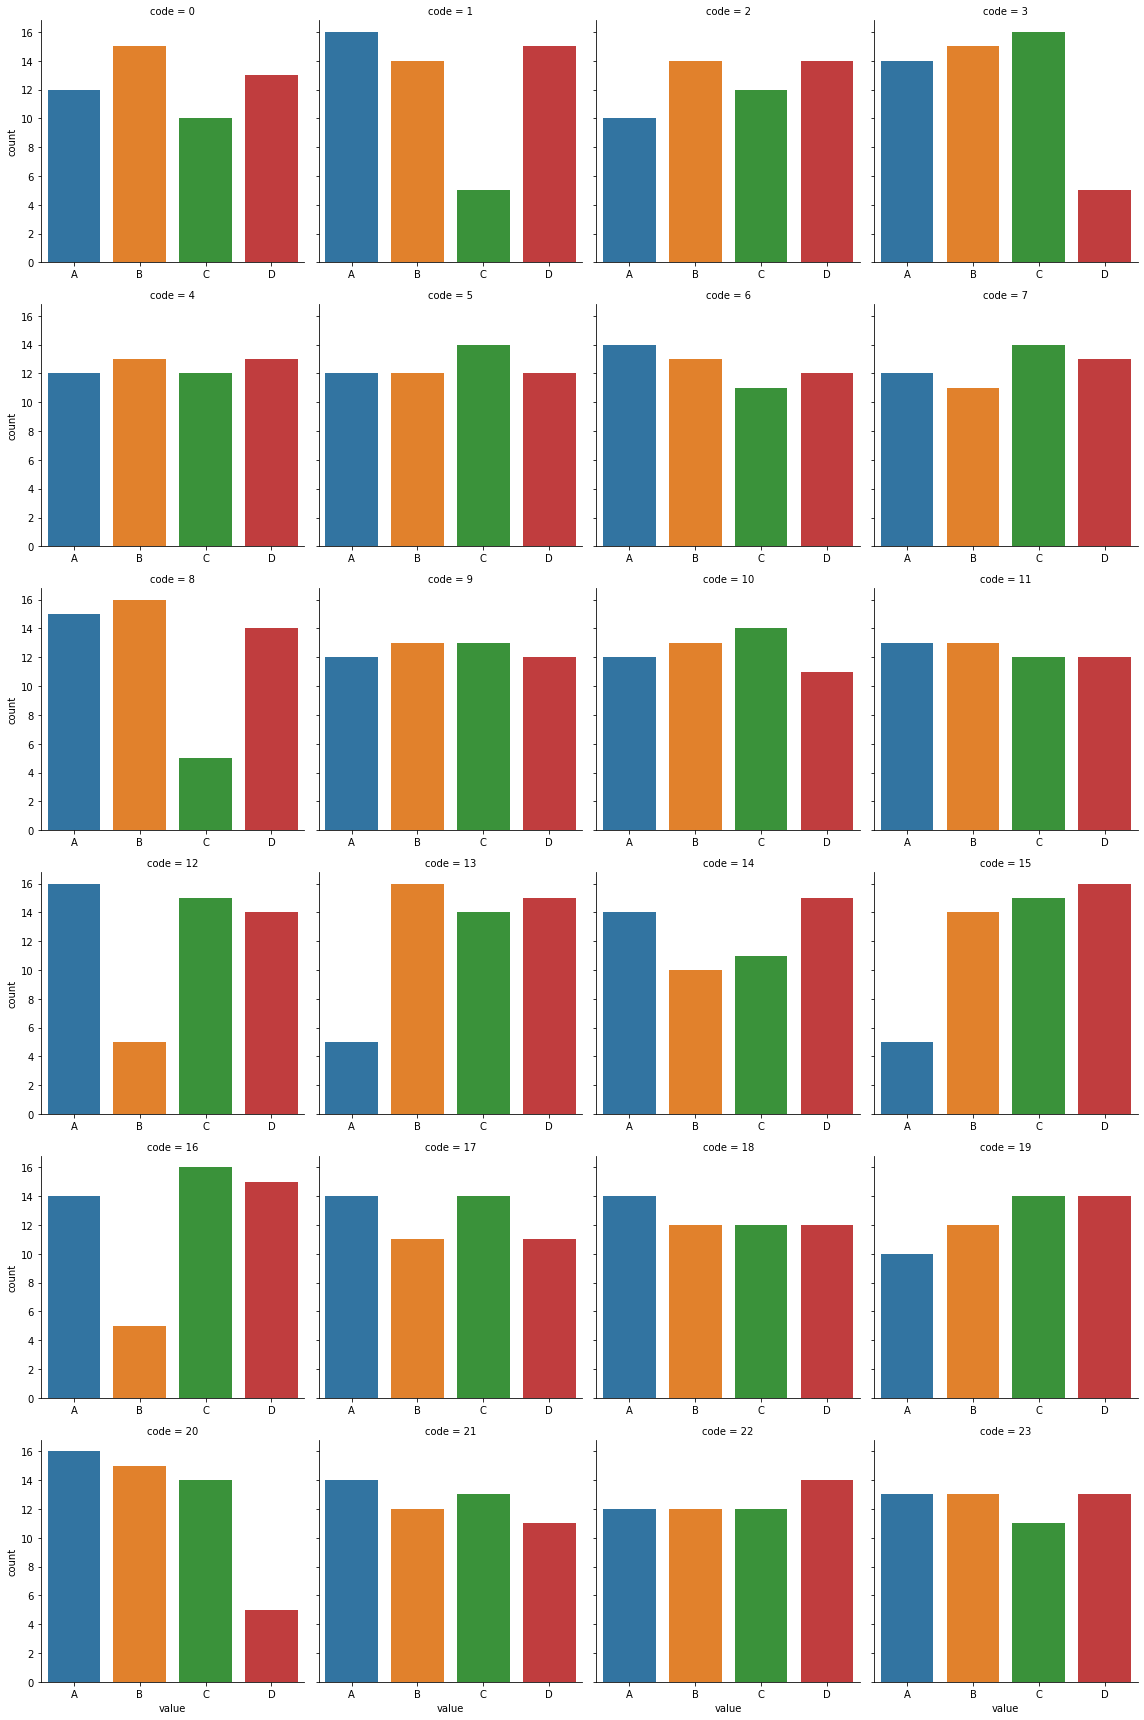

In [ ]:
plot_dist_each_exam_code(answer_2021)

### Testing

In [ ]:
_, total_2018 = np.unique(answer_2018, return_counts = True)
_, total_2019 = np.unique(answer_2019, return_counts = True)
_, total_2021 = np.unique(answer_2021, return_counts = True)

keys = ['A', 'B', 'C', 'D']
years = ['2018', '2019', '2021']

total_keys = pd.DataFrame(np.stack((total_2018, total_2019, total_2021), axis = 0), years, keys)
total_keys = pd.concat([pd.concat([total_keys], keys = ['Years'], axis = 0)], keys = ['Letters'], axis = 1)

total_keys

Letters               
                 A    B    C    D
Years 2018     301  297  302  300
      2019     305  298  299  298
      2021     301  299  299  301

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplot(1, 3, 1)
plt.imshow(continuity_2018)
plt.title('2018')
plt.subplot(1, 3, 2)
plt.imshow(continuity_2019)
plt.title('2019')
plt.subplot(1, 3, 3)
plt.imshow(continuity_2021)
plt.title('2021')

In [ ]:
def what_if_Bob_knows_for_sure(x, answer_year, code):

  table = np.zeros((3, 7))
  table[0][0] = x
  table[1][1] = 50 - x
  table[1][2] = 0.25*(50-x)
  table[2][2] = 0.25

  first_letters, num_first_letters = np.unique(answer_year[0:x, code], return_counts = True)
  first_letters, num_first_letters = first_letters.tolist(), num_first_letters.tolist()

  last_letters, num_last_letters = np.unique(answer_year[x:49, code], return_counts = True)
  last_letters, num_last_letters = last_letters.tolist(), num_last_letters.tolist()

  if len(first_letters) == 4:

    _, table[0, 3:] = np.unique(answer_year[0:x, code], return_counts = True)

  if len(last_letters) == 4:

    _, table[1, 3:] = np.unique(answer_year[x:49, code], return_counts = True)

  if len(first_letters) != 4:

    letters = ['A', 'B', 'C', 'D']
    missing_letters = [x for x in letters if x not in first_letters][0]
    first_letters.append(missing_letters)
    first_letters = sorted(first_letters)
    missing_letters_index = np.where(np.array(first_letters) == missing_letters)[0][0]
    num_first_letters.insert(missing_letters_index, 0)
    table[0, 3:] = np.array(num_first_letters)

  if len(last_letters) != 4:

    letters = ['A', 'B', 'C', 'D']
    missing_letters = [x for x in letters if x not in last_letters]
    for i in range(len(missing_letters)):
      last_letters.append(missing_letters[i])
      last_letters = sorted(last_letters)
      missing_letters_index = np.where(np.array(last_letters) == missing_letters[i])[0][0]
      num_last_letters.insert(missing_letters_index, 0)
    table[1, 3:] = np.array(num_last_letters)
  
  table[2, 3:] = table[1, 3:] / (50 - x)
  table = np.round(table, 2)

    #print("15 questions and there are only ", first_letters, ". Of course, our choice will be", missing_letters) 

  rows = ['Number of certain answers', 'Number of the rest', 'Probability']
  columns = ['Sure', 'Rest', 'Expected', 'A', 'B', 'C', 'D']
  df = pd.DataFrame(table, rows, columns)

  return df

In [ ]:
for i in range(24):
  print('code', i)
  print(what_if_Bob_knows_for_sure(15, answer_2018, i))

code 0
                           Sure  Rest  Expected      A      B     C     D
Number of certain answers  15.0   0.0      0.00   2.00   4.00  7.00  2.00
Number of the rest          0.0  35.0      8.75  12.00  10.00  9.00  3.00
Probability                 0.0   0.0      0.25   0.34   0.29  0.26  0.09
code 1
                           Sure  Rest  Expected     A     B    C      D
Number of certain answers  15.0   0.0      0.00  4.00  4.00  5.0   2.00
Number of the rest          0.0  35.0      8.75  6.00  9.00  7.0  12.00
Probability                 0.0   0.0      0.25  0.17  0.26  0.2   0.34
code 2
                           Sure  Rest  Expected      A     B     C      D
Number of certain answers  15.0   0.0      0.00   4.00  5.00  3.00   3.00
Number of the rest          0.0  35.0      8.75  12.00  9.00  2.00  11.00
Probability                 0.0   0.0      0.25   0.34  0.26  0.06   0.31
code 3
                           Sure  Rest  Expected      A      B     C     D
Number of certain 